# Overview
Welcome to the 2025 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting an approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

Your Goal: The objective of this challenge is to forecast sticker sales in different countries. "At Kaggle, we take stickers seriously!"

Evaluation
Submissions are evaluated using the Mean Absolute Percentage Error (MAPE).

Submission File
For each id row in the test set, you must predict the target num_sold. The file should contain a header and have the following format:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
display(train.head())
display(test.head())

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [5]:
print(train.shape, test.shape)

(230130, 6) (98550, 5)


In [6]:
train.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

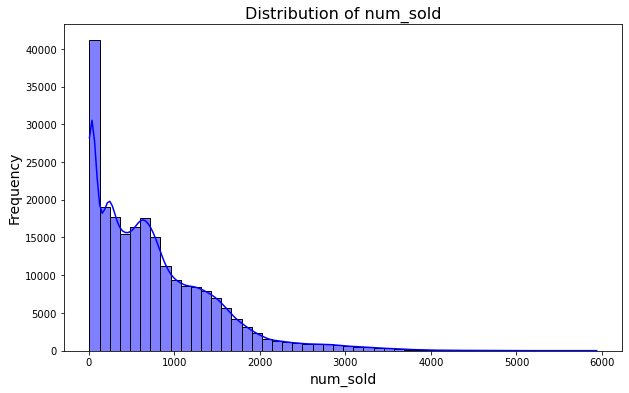

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(train['num_sold'], kde=True, bins=50, color='blue')
plt.title('Distribution of num_sold', fontsize=16)
plt.xlabel('num_sold', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# 데이터의 특징

train.csv - 날짜-국가-매장-품목 조합에 대한 판매 데이터를 포함하는 훈련 세트입니다.
date를 날짜 데이터
나머지 컬럼은 'Object' 컬럼
num_sold에 NaN값이 있음. 

In [42]:
#날짜데이터 전처리
train['date'] = pd.to_datetime(train['date'])
train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day

test['date'] = pd.to_datetime(test['date'])
test['year'] = pd.to_datetime(test['date']).dt.year
test['month'] = pd.to_datetime(test['date']).dt.month
test['day'] = pd.to_datetime(test['date']).dt.day

In [43]:
train.head()

,id,date,country,store,product,num_sold,year,month,day
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,1
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1


In [44]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['country', 'store', 'product']:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        230130 non-null  int64         
 1   date      230130 non-null  datetime64[ns]
 2   country   230130 non-null  int32         
 3   store     230130 non-null  int32         
 4   product   230130 non-null  int32         
 5   num_sold  221259 non-null  float64       
 6   year      230130 non-null  int64         
 7   month     230130 non-null  int64         
 8   day       230130 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(4)
memory usage: 13.2 MB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       98550 non-null  int64         
 1   date     98550 non-null  datetime64[ns]
 2   country  98550 non-null  int32         
 3   store    98550 non-null  int32         
 4   product  98550 non-null  int32         
 5   year     98550 non-null  int64         
 6   month    98550 non-null  int64         
 7   day      98550 non-null  int64         
dtypes: datetime64[ns](1), int32(3), int64(4)
memory usage: 4.9 MB


In [47]:
#결측값 처리 
train = train.dropna(subset=['num_sold'])

In [48]:
train.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
year        0
month       0
day         0
dtype: int64

In [49]:
train.shape

(221259, 9)

In [50]:
y_train = train.pop('num_sold')
train_id = train.pop('id')
test_id = test.pop('id')
date_train = train.pop('date')
date_test = test.pop('date')

XGBoost는 기본적으로 datetime 타입을 처리하지 못하는 것을 알았다 
그래서 date컬럼을 삭제했다.

In [51]:
print(train.shape, test.shape)

(221259, 6) (98550, 6)


In [55]:
#데이터 8:2로 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, y_train, test_size=0.2, random_state=2025)


In [59]:
from xgboost import XGBRegressor
xgb_mb= XGBRegressor() # Unpack the best_parameter dictionary
xgb_mb.fit(X_tr ,y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [60]:
pred = xgb_mb.predict(X_val)

In [62]:
# MAPE 값
from sklearn.metrics import mean_absolute_error
import numpy as np
def mape(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    return (mae / np.mean(y_true)) * 100
mape(y_val, pred)

7.87322195386444

In [64]:
# 제출
pred = xgb_mb.predict(test)
sub = pd.DataFrame({'id': test_id,
                   'num_sold': pred})
sub.to_csv('result13.csv', index = False)